# 目录
## 自己实现的 逻辑回归
## sklearn 逻辑回归
## sklearn 支持向量机

# Logistic Regression

In [110]:
import pandas as pd
data = pd.read_csv('ex2data1.csv')
data.head()

,X1,X2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [111]:
data.tail()

,X1,X2,y
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


In [112]:
X = data[['X1', 'X2']]
y = data['y']
print type(X)
print type(y)
m = len(y)
print m

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
100


In [113]:
import seaborn as sns
%matplotlib inline

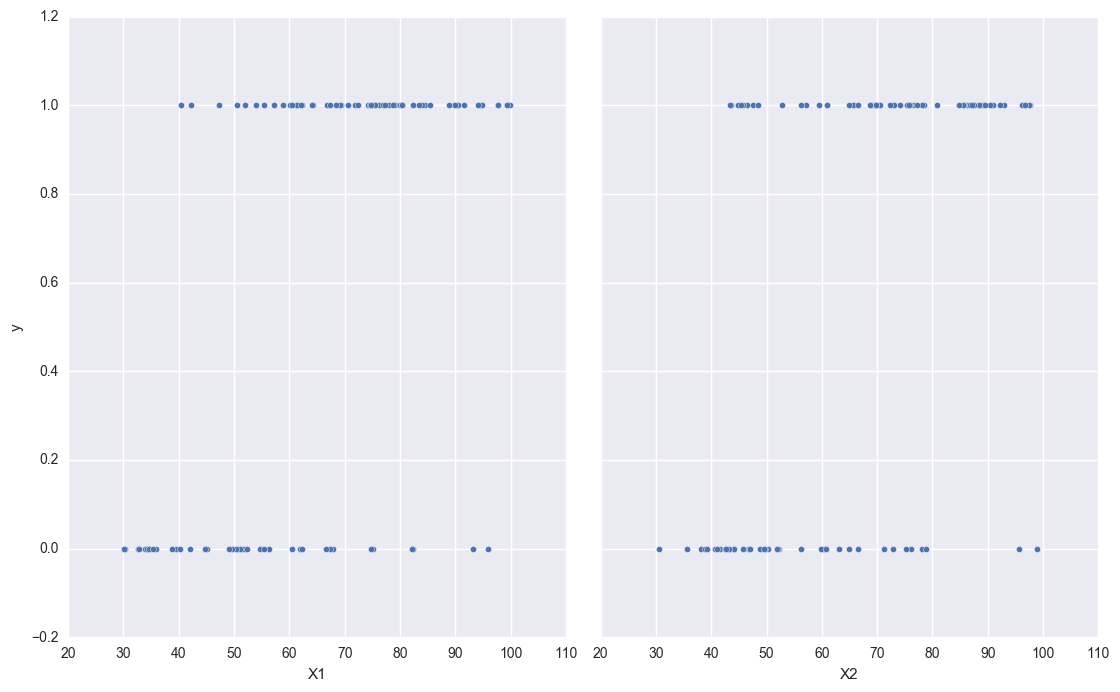

In [114]:
# 可视化
sns.pairplot(data, x_vars=['X1', 'X2'], y_vars='y', size=7, aspect=0.8)

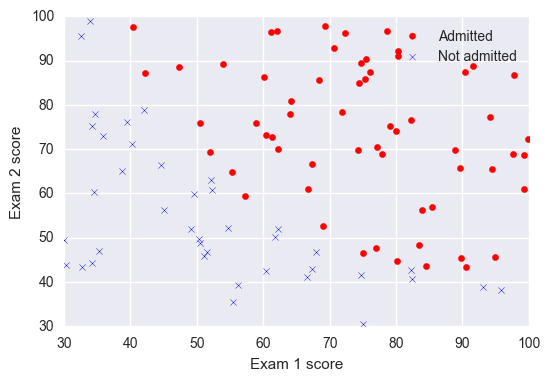

In [115]:
import matplotlib.pyplot as plt
fig = plt.figure()
pos = (y == 1); neg = (y == 0)
plt.scatter(X[pos]['X1'],X[pos]['X2'], color='red', marker='o')
plt.scatter(X[neg]['X1'],X[neg]['X2'], color='blue', marker='x')
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])
plt.show()

In [116]:
# 转换为numpy类型
import numpy as np
X = X.as_matrix()
print type(X)
print X.shape
y = y.as_matrix()
print type(y)
print y.shape
y.resize(m, 1)
y.shape

<type 'numpy.ndarray'>
(100, 2)
<type 'numpy.ndarray'>
(100,)


(100, 1)

In [117]:
m,n = np.shape(X)
X = np.hstack([np.ones([m, 1]), X])
X.shape

(100, 3)

In [118]:
initial_theta = np.zeros((n+1, 1))

In [119]:
from costFunction import costFunction
from gradient import gradient
import numpy as np
import scipy.optimize as op

In [120]:
cost = costFunction(initial_theta, X, y)
cost

0.69314718055994529

In [121]:
Result = op.minimize(fun=costFunction,x0=initial_theta,args=(X,y), method='TNC',jac=gradient)
optimal_theta = Result.x
print optimal_theta

[-25.16131854   0.20623159   0.20147149]


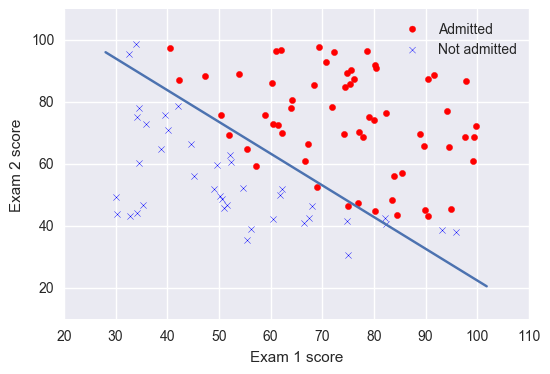

In [122]:
from plotDecisionBoundary import plotDecisionBoundary
plotDecisionBoundary(optimal_theta, X, y)

In [123]:
from predict import predict
y_pre = predict(optimal_theta, X)
np.mean(y_pre == y) # 正确率为89%

0.89000000000000001

# Regularized logistic regression

In [124]:
import pandas as pd
data = pd.read_csv('ex2data2.csv')
data.head()

,X1,X2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [125]:
data.tail()

,X1,X2,y
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0
117,0.632650,-0.030612,0


In [126]:
X = data[['X1', 'X2']]
y = data['y']
print type(X)
print type(y)
m = len(y)
print m

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
118


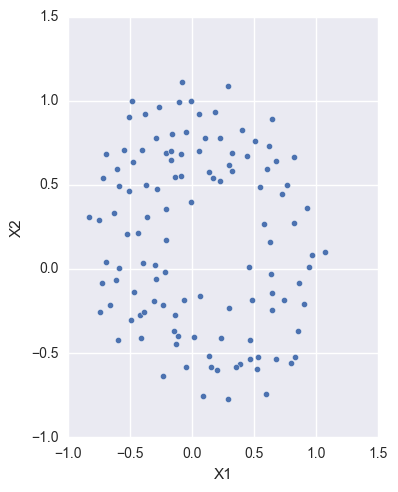

In [127]:
# 可视化
sns.pairplot(data, x_vars=['X1'], y_vars=['X2'], size=5, aspect=0.8)

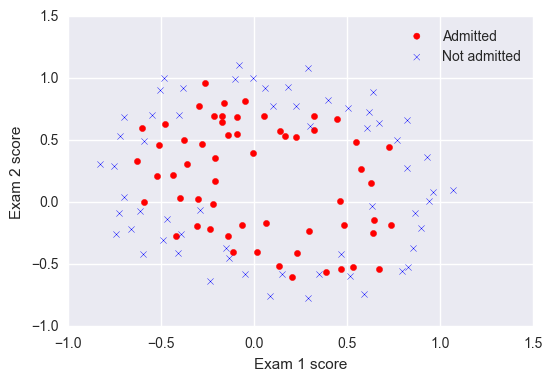

In [128]:
import matplotlib.pyplot as plt
fig = plt.figure()
pos = (y == 1)
neg = (y == 0)
plt.scatter(X[pos]['X1'],X[pos]['X2'], color='red', marker='o')
plt.scatter(X[neg]['X1'],X[neg]['X2'], color='blue', marker='x')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])
plt.show()

In [129]:
# 转换为numpy类型
import numpy as np
X = X.as_matrix()
print type(X)
print X.shape
y = y.as_matrix()
print type(y)
print y.shape
y.resize(m, 1)
y.shape
Last_PlotX = np.hstack([np.ones((m, 1)), X])

<type 'numpy.ndarray'>
(118, 2)
<type 'numpy.ndarray'>
(118,)


In [130]:
from mapFeature import mapFeature
X = mapFeature(X[:, 0], X[:, 1])
X.shape

(118, 16)

In [131]:
initial_theta = np.zeros((np.size(X, axis=1), 1))
initial_theta.shape

(16, 1)

In [132]:
lamb = 1
from costFunctionReg import costFunctionReg
cost = costFunctionReg(initial_theta, X, y, lamb)
cost

array([ 0.69314718])

In [133]:
from costFunctionReg import costFunctionReg
from gradientReg import gradientReg
import numpy as np
import scipy.optimize as op

In [134]:
Result = op.minimize(fun=costFunctionReg,x0=initial_theta,args=(X,y,lamb), method='TNC',jac=gradientReg)
optimal_theta = Result.x
print optimal_theta
optimal_theta.reshape((16, 1))
len(optimal_theta)

[  0.51045299  -3.51775752  18.42822132 -12.49852531  17.91888246
  46.8287763   16.10373739 -43.76259066 -11.82787992 -41.53314431
  23.14976615  -4.25545251 -30.79393144  18.14226738 -57.03591824
 -33.93819148]


16

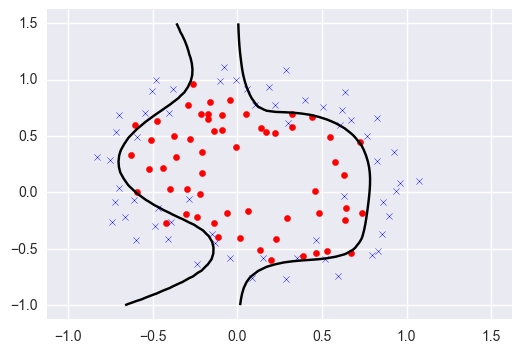

In [135]:
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(Last_PlotX[pos[0], 1], Last_PlotX[pos[0], 2], color='red', marker='o')
plt.scatter(Last_PlotX[neg[0], 1], Last_PlotX[neg[0], 2], color='blue', marker='x')
  
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = mapFeature(u[i], v[j]).dot(optimal_theta)
z = z.T
plt.contour(u, v, z, colors=['k'], levels=[0])
plt.show()

In [136]:
from predict import predict
y_pre = predict(optimal_theta, X)
np.mean(y_pre == y) # 正确率在82%

0.82203389830508478

# 下面使用sklearn
 - 使用逻辑回归
 - 使用支持向量机

In [137]:
print X[0]   # 要使用sklearn，要把这边X的第一列给去掉
print X[0,1:]

[  1.00000000e+00   5.12670000e-02   2.62830529e-03   3.58643425e-02
   1.34745327e-04   1.83865725e-03   2.50892595e-02   6.90798869e-06
   9.42624411e-05   1.28625106e-03   1.75514423e-02   3.54151856e-07
   4.83255257e-06   6.59422333e-05   8.99809795e-04   1.22782870e-02]
[  5.12670000e-02   2.62830529e-03   3.58643425e-02   1.34745327e-04
   1.83865725e-03   2.50892595e-02   6.90798869e-06   9.42624411e-05
   1.28625106e-03   1.75514423e-02   3.54151856e-07   4.83255257e-06
   6.59422333e-05   8.99809795e-04   1.22782870e-02]


In [138]:
from sklearn.linear_model import LogisticRegression
cf = LogisticRegression(C=1) # C有默认值1
cf.fit(X[:,1:], y)

/Users/hehongwei/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [139]:
print cf.coef_    #系数
print cf.coef_.shape
type(cf.coef_)

[[ 0.32791208 -1.53183279 -0.55447932  0.07779922 -0.1617468  -0.38338539
  -1.33107525  0.03992861 -0.91610755  0.05332404 -0.30127969 -0.09049414
  -0.08448659 -0.4328698  -0.20150996]]
(1, 15)


numpy.ndarray

In [140]:
print cf.intercept_     #截距
print cf.intercept_.shape
type(cf.intercept_)

[ 0.50392862]
(1,)


numpy.ndarray

In [141]:
cf.intercept_.resize((1,1))
cf.coef_.resize((15, 1))
print cf.intercept_.shape
print cf.coef_.shape
print cf.intercept_
print cf.coef_

(1, 1)
(15, 1)
[[ 0.50392862]]
[[ 0.32791208]
 [-1.53183279]
 [-0.55447932]
 [ 0.07779922]
 [-0.1617468 ]
 [-0.38338539]
 [-1.33107525]
 [ 0.03992861]
 [-0.91610755]
 [ 0.05332404]
 [-0.30127969]
 [-0.09049414]
 [-0.08448659]
 [-0.4328698 ]
 [-0.20150996]]


In [142]:
sklearn_theta = np.vstack([cf.intercept_, cf.coef_])
sklearn_theta.shape

(16, 1)

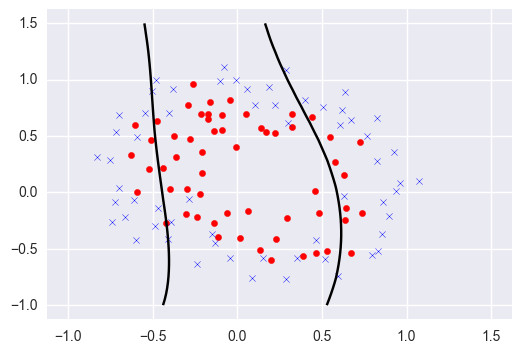

In [143]:
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(Last_PlotX[pos[0], 1], Last_PlotX[pos[0], 2], color='red', marker='o')
plt.scatter(Last_PlotX[neg[0], 1], Last_PlotX[neg[0], 2], color='blue', marker='x')
  
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = mapFeature(u[i], v[j]).dot(sklearn_theta)
z = z.T
plt.contour(u, v, z, colors=['k'], levels=[0])
plt.show()

## 下面调节参数C，这个C与支持向量机的含义一致，大则会过拟合，小就会欠拟合

In [144]:
from sklearn.linear_model import LogisticRegression
cf = LogisticRegression(C=1000) # C有默认值1
cf.fit(X[:,1:], y)
cf.intercept_.resize((1,1))
cf.coef_.resize((15, 1))
sklearn_theta = np.vstack([cf.intercept_, cf.coef_])
sklearn_theta.shape

/Users/hehongwei/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(16, 1)

In [145]:
sklearn_theta

array([[  0.59229563],
       [ -1.86313928],
       [ 12.30740789],
       [ -8.76009718],
       [ 13.86788976],
       [ 25.82846426],
       [  5.71596846],
       [-29.79728436],
       [ -8.14323412],
       [-32.17979279],
       [ 14.31065349],
       [ -6.35909631],
       [-12.9781185 ],
       [ 16.10016147],
       [-27.25709752],
       [-16.11130096]])

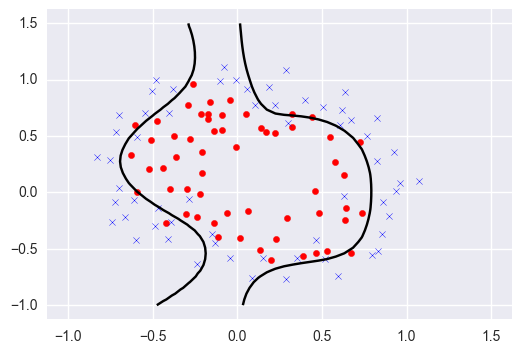

In [146]:
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(Last_PlotX[pos[0], 1], Last_PlotX[pos[0], 2], color='red', marker='o')
plt.scatter(Last_PlotX[neg[0], 1], Last_PlotX[neg[0], 2], color='blue', marker='x')
  
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = mapFeature(u[i], v[j]).dot(sklearn_theta)
z = z.T
plt.contour(u, v, z, colors=['k'], levels=[0])
plt.show()

## 使用支持向量机试试
使用支持向量机的话，就使用原先的数据

In [147]:
import pandas as pd
data = pd.read_csv('ex2data2.csv')
data.head()

,X1,X2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [148]:
data.tail()

,X1,X2,y
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0
117,0.632650,-0.030612,0


In [149]:
X = data[['X1', 'X2']]
y = data['y']
print type(X)
print X.shape
print type(y)
print y.shape

<class 'pandas.core.frame.DataFrame'>
(118, 2)
<class 'pandas.core.series.Series'>
(118,)


In [150]:
from sklearn.svm import SVC
clf = SVC() # 默认C=1.0，核为高斯核rbf，gamma为auto
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [155]:
print clf.intercept_

[-3.08382633]


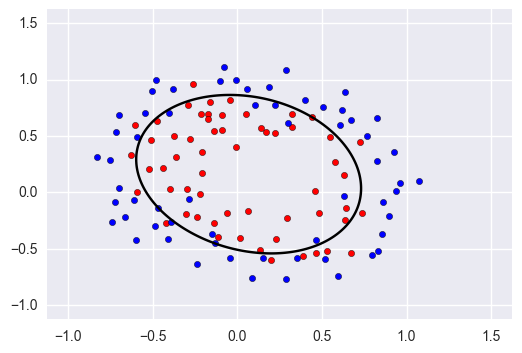

In [156]:
pos = (y==1)
neg = (y==0)
plt.scatter(X['X1'][pos], X['X2'][pos], c='r')
plt.scatter(X['X1'][neg], X['X2'][neg])

x_min = -1
x_max = 1.5
y_min = -1
y_max = 1.5
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k'], levels=[0])

plt.show()

# 上面使用的默认C，下面调整C=1000

In [167]:
clf = SVC(C=100000) # 默认C=1.0，核为高斯核rbf，gamma为auto
clf.fit(X, y)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

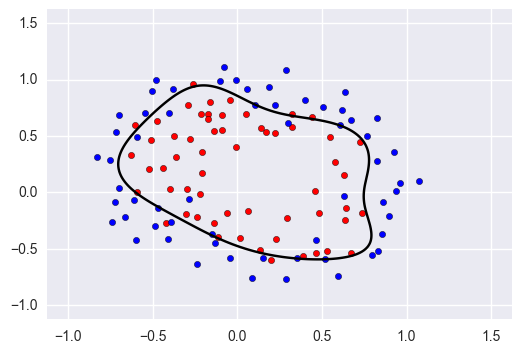

In [168]:
pos = (y==1)
neg = (y==0)
plt.scatter(X['X1'][pos], X['X2'][pos], c='r')
plt.scatter(X['X1'][neg], X['X2'][neg])

x_min = -1
x_max = 1.5
y_min = -1
y_max = 1.5
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k'], levels=[0])

plt.show()

# 下面是 SVM Exercise

/Users/hehongwei/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/hehongwei/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/hehongwei/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/hehongwei/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


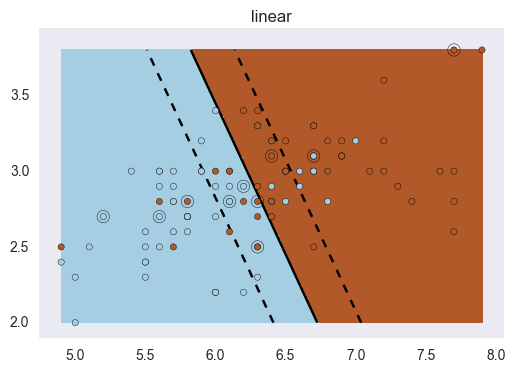

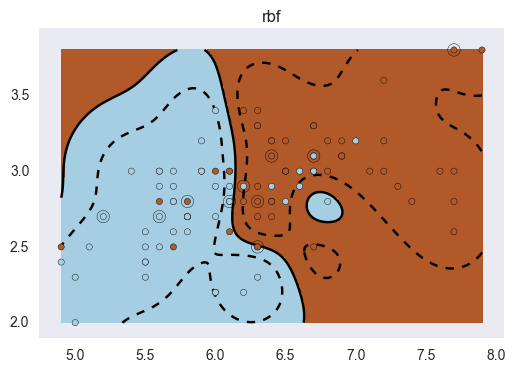

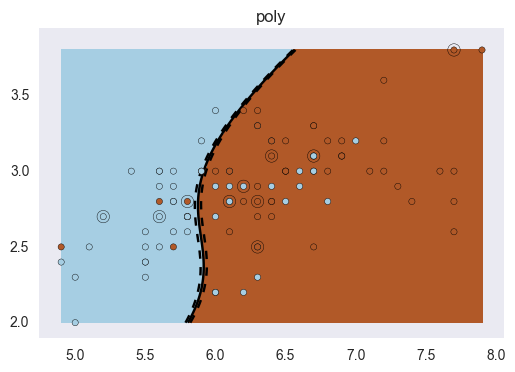

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:.9 * n_sample]
y_train = y[:.9 * n_sample]
X_test = X[.9 * n_sample:]
y_test = y[.9 * n_sample:]

# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()